In [1]:
import sys
sys.path.append("../..")
import library as lb
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import scipy.integrate as integrate

## Uniform distribution

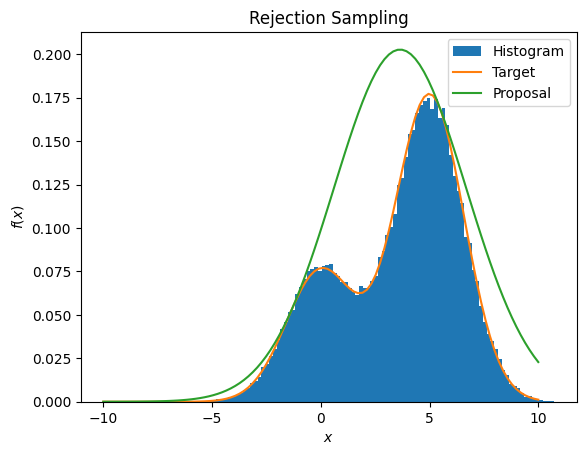

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered 

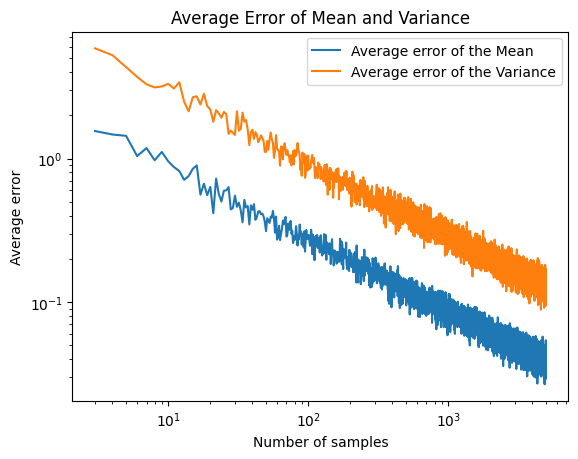

In [2]:


START = -10
END = 10
n_samples = 5000
n_runs = 40

# Compute 'area' once outside the function
func = lambda x: 0.3 * np.exp(-0.2 * x**2) + 0.7 * np.exp(-0.2 * (x - 5)**2)

area = integrate.quad(func, START, END)[0]

def f(x):
    return func(x) / area

# mean and variance of the target distribution
mean_theoretical = integrate.quad(lambda x: x * f(x), START, END)[0]
var_theoretical = integrate.quad(lambda x: (x - mean_theoretical)**2 * f(x), START, END)[0]

mu_opt, sigma_opt, K_opt = lb.optimize_envelope(f, START, END)

def g(x):
    return stats.norm.pdf(x, mu_opt, sigma_opt)

def inv_cdf(p):
    return stats.norm.ppf(p, mu_opt, sigma_opt)

# Compute 'K' once
x = np.linspace(START, END, 100)
K = np.max(f(x) / g(x))

# Run Rejection Sampling
samples = lb.Rejection(f, g, inv_cdf, START, END, K, 100000)

# Plot of the target distribution, the proposal distribution and the histogram of the samples
plt.title('Rejection Sampling')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.hist(samples, bins=100, density=True, label='Histogram')
plt.plot(x, f(x), label='Target')
plt.plot(x, K*g(x), label='Proposal')
plt.legend()
plt.show()

# Run Rejection Sampling
average_error_mean = np.zeros(n_samples)
average_error_variance = np.zeros(n_samples)
for n in range(1, n_samples):
    for _ in range(n_runs):
        samples = lb.Rejection(f, g, inv_cdf, START, END, K, n)
        mean = np.mean(samples)
        var = np.var(samples)
        average_error_mean[n] += np.abs(mean - mean_theoretical)/ n_runs
        average_error_variance[n] += np.abs(var - var_theoretical) / n_runs

# Plot of the average error of the mean and variance
plt.title('Average Error of Mean and Variance')

plt.xlabel('Number of samples')
plt.ylabel('Average error')

plt.loglog(average_error_mean, label='Average error of the Mean')
plt.loglog(average_error_variance, label='Average error of the Variance')

plt.legend()
plt.show()


In [3]:
print(mu_opt, sigma_opt, K_opt)

3.64402197948783 3.0415300325281844 1.5454781112334395
